In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df = pd.read_csv(
    'C:/Users/User/Desktop/data mining/datawarehouse/data-mining-warehousing-wages-analysis/data/prep_survey_profile.csv',
    encoding='utf-8'
)

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Preview the first few rows
print(df.head())

df.info()


  What is your age (# years)? What is your gender?  \
0                       40-44                 Male   
1                       22-24                 Male   
2                       22-24                 Male   
3                       22-24               Female   
4                       55-59                 Male   

  In which country do you currently reside?  \
0                                 Australia   
1                                     India   
2                                     India   
3                  United States of America   
4                               Netherlands   

  What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
0                                    Master’s degree                                                                
1                                  Bachelor’s degree                                                                
2                                    Mast

C:\Users\User\AppData\Local\Temp\ipykernel_9400\2634974029.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [2]:

sequences = df.values.tolist()  # Convert each row into a list (sequence of answers)

# Preview sequences
for seq in sequences[:3]:  # Print the first three sequences
    print(seq)

sequences_str = [[str(item).strip() for item in sequence] for sequence in sequences]
# Convert sequences into one-hot-encoded format
te = TransactionEncoder()
one_hot = te.fit_transform(sequences_str)
df_one_hot = pd.DataFrame(one_hot, columns=te.columns_)

# Find frequent patterns
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_one_hot, min_support=0.1, use_colnames=True)
print(frequent_itemsets)


['40-44', 'Male', 'Australia', 'Master’s degree', 'Other', 'Enterprise', '20+', 'I do not know', '250,000-299,999', '$10,000-$99,999', 'Local development environments', '1-2 years', 'Python', 'Used TPU', '2-3 years']
['22-24', 'Male', 'India', 'Bachelor’s degree', 'Other', 'Small', '0', 'No (we do not use ML methods)', '4,000-4,999', '$0 (USD)', 'Local development environments', '< 1 years', 'Python', 'Never', '< 1 years']
['22-24', 'Male', 'India', 'Master’s degree', 'Data Scientist', 'Medium', '20+', 'We are exploring ML methods (and may one day put a model into production)', '10,000-14,999', '$100-$999', 'Local development environments', '3-5 years', 'Python', 'Used TPU', '2-3 years']
      support                                           itemsets
0    0.269906                                         ($0 (USD))
1    0.104757                                           ($0-999)
2    0.122708                                           ($1-$99)
3    0.116425                              

In [4]:
# Step 1: Replace 'unknown' with a placeholder and handle NaN values
sequences_cleaned = [[str(item).strip() if pd.notna(item) else 'missing' for item in sequence] for sequence in sequences]
sequences_cleaned = [[item if item != 'unknown' else 'unknown_value' for item in sequence] for sequence in sequences_cleaned]

# Debugging: Print cleaned sequences
print("Cleaned Sequences:", sequences_cleaned)

# Step 2: One-hot encoding
te = TransactionEncoder()
one_hot = te.fit_transform(sequences_cleaned)
df_one_hot = pd.DataFrame(one_hot, columns=te.columns_)


# Step 3: Frequent itemset generation
frequent_itemsets = apriori(df_one_hot, min_support=0.1, use_colnames=True)

# Debugging: Check frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

Cleaned Sequences: [['40-44', 'Male', 'Australia', 'Master’s degree', 'Other', 'Enterprise', '20+', 'I do not know', '250,000-299,999', '$10,000-$99,999', 'Local development environments', '1-2 years', 'Python', 'Used TPU', '2-3 years'], ['22-24', 'Male', 'India', 'Bachelor’s degree', 'Other', 'Small', '0', 'No (we do not use ML methods)', '4,000-4,999', '$0 (USD)', 'Local development environments', '< 1 years', 'Python', 'Never', '< 1 years'], ['22-24', 'Male', 'India', 'Master’s degree', 'Data Scientist', 'Medium', '20+', 'We are exploring ML methods (and may one day put a model into production)', '10,000-14,999', '$100-$999', 'Local development environments', '3-5 years', 'Python', 'Used TPU', '2-3 years'], ['22-24', 'Female', 'United States of America', 'Bachelor’s degree', 'Data Scientist', 'Enterprise', '20+', 'We recently started using ML methods (i.e., models in production for less than 2 years)', '80,000-89,999', '$0 (USD)', 'Local development environments', '3-5 years', 'Pyth

In [7]:
# Find frequent itemsets with a minimum support of 0.5 (adjust as needed)
frequent_itemsets = apriori(df_one_hot, min_support=0.4, use_colnames=True)

# Display frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Get association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.4,num_itemsets=28)

# Display the rules
print("Association Rules:")
print(rules)


Frequent Itemsets:
     support                                        itemsets
0   0.604308                (Local development environments)
1   0.869214                                          (Male)
2   0.480831                               (Master’s degree)
3   0.778561                                         (Never)
4   0.801000                                        (Python)
5   0.529555          (Male, Local development environments)
6   0.479420         (Local development environments, Never)
7   0.487242        (Local development environments, Python)
8   0.413515                         (Master’s degree, Male)
9   0.672009                                   (Male, Never)
10  0.700090                                  (Male, Python)
11  0.620336                                 (Never, Python)
12  0.417746   (Male, Local development environments, Never)
13  0.428901  (Male, Local development environments, Python)
14  0.538531                           (Male, Never, Python)
Assoc

In [8]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Adjust the min_support as needed (e.g., 0.1 to 0.3 for more patterns)
frequent_itemsets = apriori(df_one_hot, min_support=0.5, use_colnames=True)

# Generate association rules with adjusted confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5,num_itemsets=27)

# Display top rules
print(rules.head(10))


                        antecedents                       consequents  \
0                            (Male)  (Local development environments)   
1  (Local development environments)                            (Male)   
2                            (Male)                           (Never)   
3                           (Never)                            (Male)   
4                            (Male)                          (Python)   
5                          (Python)                            (Male)   
6                           (Never)                          (Python)   
7                          (Python)                           (Never)   
8                     (Male, Never)                          (Python)   
9                    (Male, Python)                           (Never)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.869214            0.604308  0.529555    0.609234  1.008152   
1            0.604308            0.869214 

In [9]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual one-hot encoded DataFrame)
# df_one_hot = pd.read_csv('your_data.csv') # Uncomment this line if you have a CSV file

# Calculate frequent itemsets
frequent_itemsets = apriori(df_one_hot, min_support=0.5, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5,num_itemsets=4)

# Function to calculate additional metrics
def calculate_metrics(rules):
    # Calculate leverage
    rules['leverage'] = rules['support'] - (rules['antecedent support'] * rules['consequent support'])
    
    # Calculate conviction
    rules['conviction'] = (1 - rules['consequent support']) / (1 - rules['confidence'])
    
    return rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']]

# Calculate and display the metrics
rules_with_metrics = calculate_metrics(rules)

# Convert DataFrame to a tabular format and print
print(tabulate(rules_with_metrics, headers='keys', tablefmt='grid'))


+----+-----------------------------------------------+-----------------------------------------------+-----------+--------------+----------+--------------+--------------+
|    | antecedents                                   | consequents                                   |   support |   confidence |     lift |     leverage |   conviction |
+====+===============================================+===============================================+===========+==============+==========+==============+==============+
|  0 | frozenset({'Male'})                           | frozenset({'Local development environments'}) |  0.529555 |     0.609234 | 1.00815  |  0.00428188  |     1.01261  |
+----+-----------------------------------------------+-----------------------------------------------+-----------+--------------+----------+--------------+--------------+
|  1 | frozenset({'Local development environments'}) | frozenset({'Male'})                           |  0.529555 |     0.8763   | 1.00815  |  0.0

In [14]:
frequent_itemsets = apriori(df_one_hot, min_support=0.5, use_colnames=True)

# Step 2: Generate all association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5,num_itemsets=5)

# Step 3: Filter rules for chain lengths of 3 or more
rules = rules[
    (rules['antecedents'].apply(len) + rules['consequents'].apply(len) >= 2)
]

# Step 4: Function to calculate additional metrics
def calculate_metrics(rules):
    rules['leverage'] = rules['support'] - (rules['antecedent support'] * rules['consequent support'])
    rules['conviction'] = (1 - rules['consequent support']) / (1 - rules['confidence'])
    return rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']]

# Step 5: Calculate and display the metrics
rules_with_metrics = calculate_metrics(rules)

# Step 6: Display the results in a tabular format
print(tabulate(rules_with_metrics, headers='keys', tablefmt='grid'))

+----+-----------------------------------------------+-----------------------------------------------+-----------+--------------+----------+--------------+--------------+
|    | antecedents                                   | consequents                                   |   support |   confidence |     lift |     leverage |   conviction |
+====+===============================================+===============================================+===========+==============+==========+==============+==============+
|  0 | frozenset({'Male'})                           | frozenset({'Local development environments'}) |  0.529555 |     0.609234 | 1.00815  |  0.00428188  |     1.01261  |
+----+-----------------------------------------------+-----------------------------------------------+-----------+--------------+----------+--------------+--------------+
|  1 | frozenset({'Local development environments'}) | frozenset({'Male'})                           |  0.529555 |     0.8763   | 1.00815  |  0.0

C:\Users\User\AppData\Local\Temp\ipykernel_9400\1670744097.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


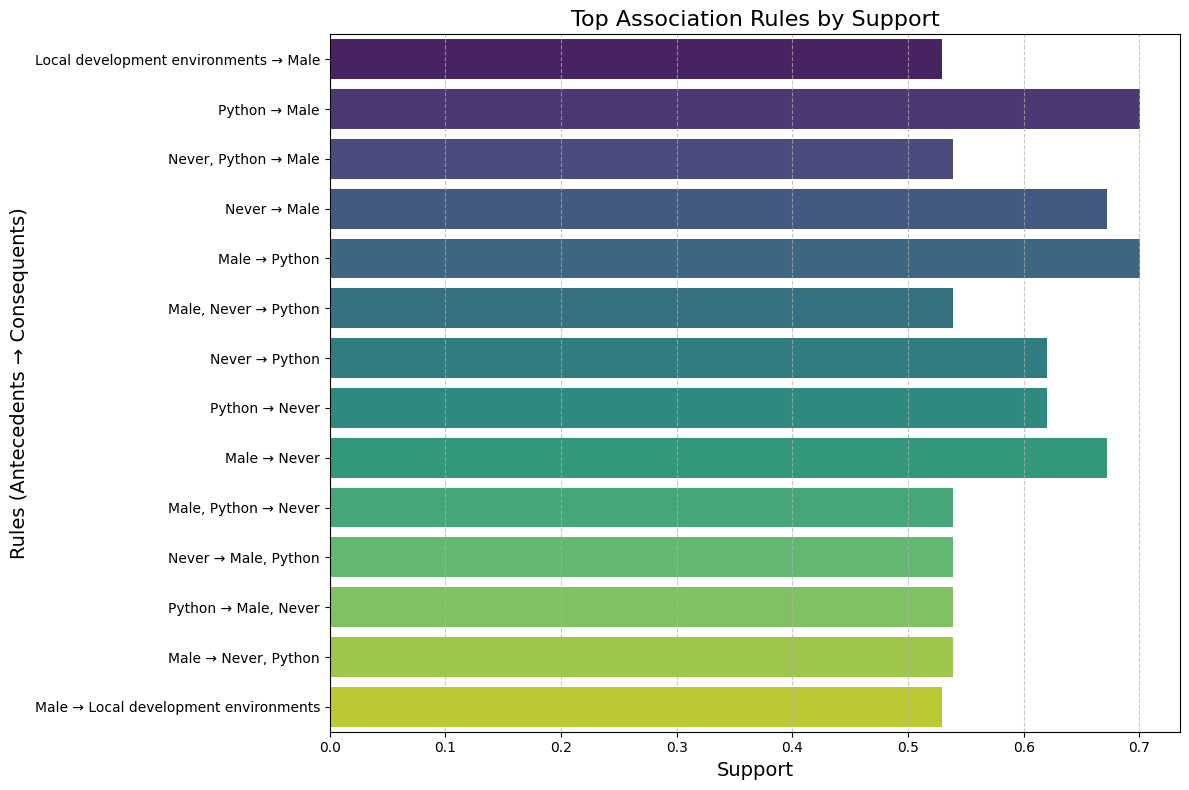

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
rules = rules[
    (rules['antecedents'].apply(len) + rules['consequents'].apply(len) >= 2)
]
# # Step 1: Create a new column for chain length
# rules['chain_length'] = rules['antecedents'].apply(len) + rules['consequents'].apply(len)

# # Step 2: Filter rules for chain lengths between 0 and 12 (or any range)
# filtered_rules = rules[(rules['chain_length'] >= 2) & (rules['chain_length'] <= 12)]

# Step 3: Sort rules by support
sorted_rules = rules.sort_values(by="confidence", ascending=False)

# Step 4: Prepare data for visualization
sorted_rules['rule'] = sorted_rules.apply(
    lambda row: f"{', '.join(list(row['antecedents']))} → {', '.join(list(row['consequents']))}", axis=1
)

# Step 5: Plot horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    x=sorted_rules['support'], 
    y=sorted_rules['rule'], 
    palette="viridis"
)
plt.title("Top Association Rules by Support", fontsize=16)
plt.xlabel("Support", fontsize=14)
plt.ylabel("Rules (Antecedents → Consequents)", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_9400\3549106178.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


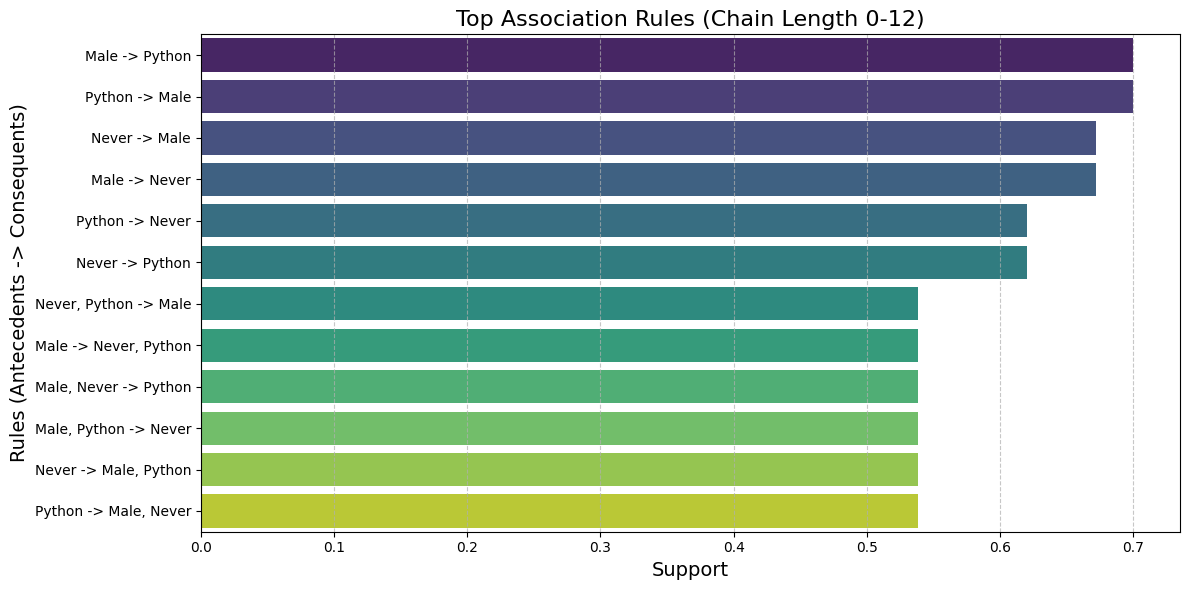

In [25]:
# Step 1: Add a column for chain length (antecedents + consequents)
rules['chain_length'] = rules['antecedents'].apply(len) + rules['consequents'].apply(len)

# Step 2: Filter rules with chain lengths from 0 to 12
filtered_rules = rules[(rules['chain_length'] >= 0) & (rules['chain_length'] <= 12)]

# Step 3: Sort rules by support
sorted_rules = filtered_rules.sort_values(by="support", ascending=False).head(12)  # Top 12 rules

# Step 4: Prepare labels for antecedents and consequents
sorted_rules['label'] = sorted_rules.apply(
    lambda row: f"{', '.join(row['antecedents'])} -> {', '.join(row['consequents'])}", axis=1
)

# Step 5: Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x=sorted_rules['support'], 
    y=sorted_rules['label'], 
    palette="viridis"
)
plt.title('Top Association Rules', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Rules (Antecedents -> Consequents)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


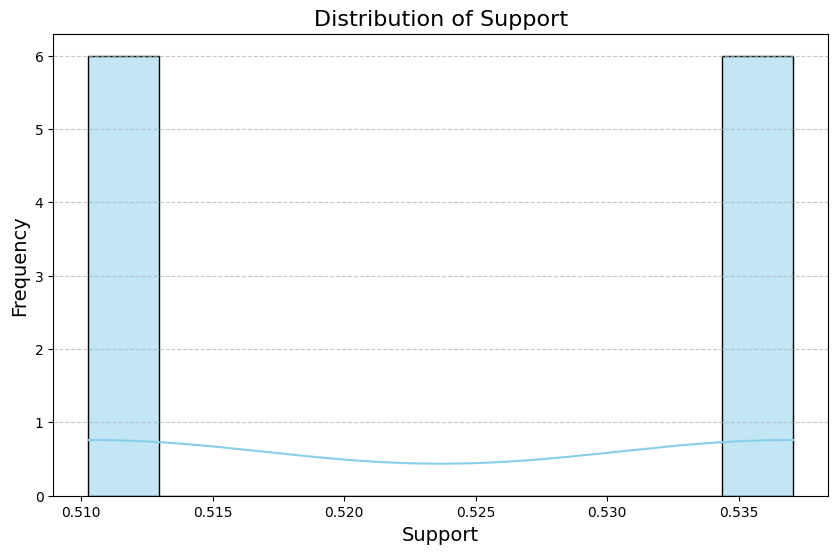

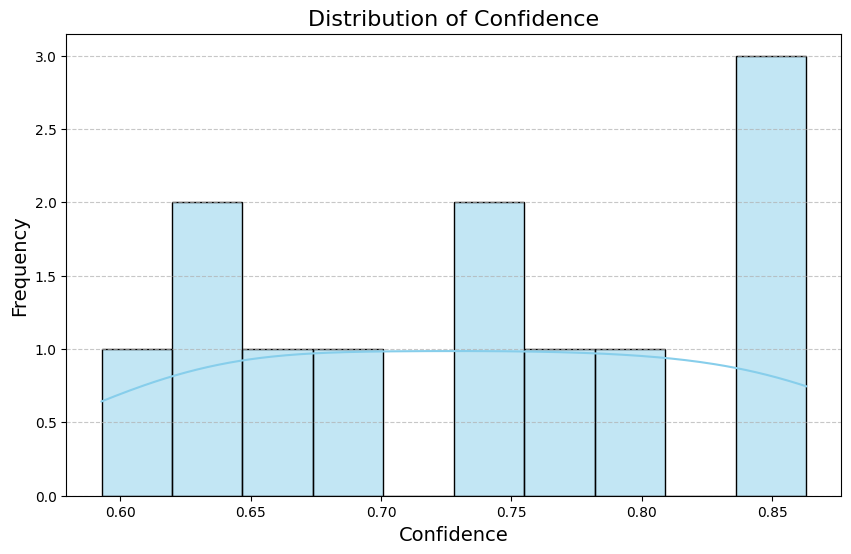

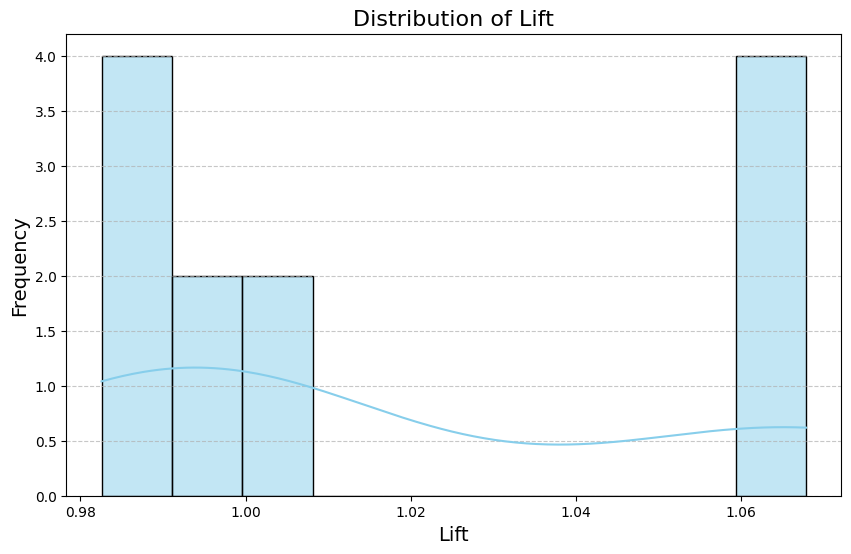

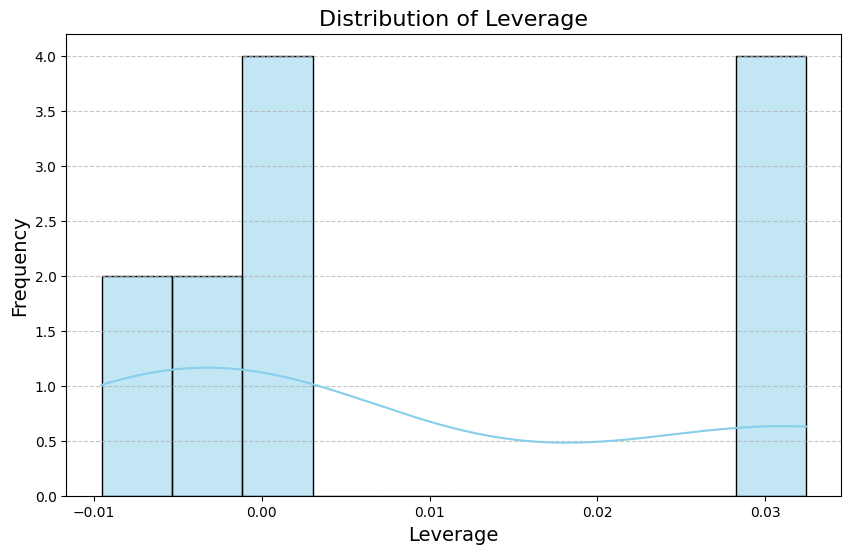

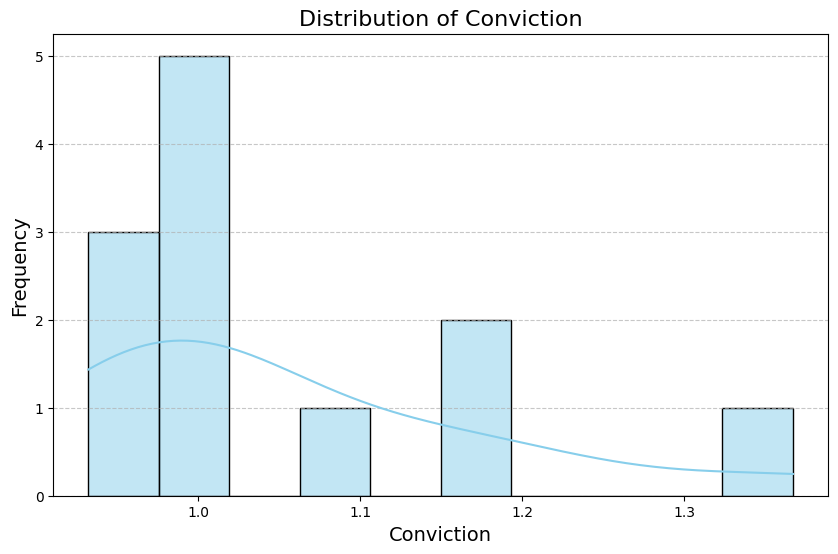

In [35]:
def plot_histogram(df, metric, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[metric], bins=10, kde=True, color="skyblue")
    plt.title(title, fontsize=16)
    plt.xlabel(metric.capitalize(), fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot histograms for each metric
plot_histogram(rules_with_metrics, 'support', 'Distribution of Support')
plot_histogram(rules_with_metrics, 'confidence', 'Distribution of Confidence')
plot_histogram(rules_with_metrics, 'lift', 'Distribution of Lift')
plot_histogram(rules_with_metrics, 'leverage', 'Distribution of Leverage')
plot_histogram(rules_with_metrics, 'conviction', 'Distribution of Conviction')

In [16]:
from collections import defaultdict

# Create a transition matrix
transitions = defaultdict(lambda: defaultdict(int))

for seq in sequences:
    for i in range(len(seq) - 1):
        transitions[seq[i]][seq[i + 1]] += 1

# Convert to a DataFrame for better visualization
transition_df = pd.DataFrame(transitions).fillna(0)
print(transition_df)


                                                     22-24    Male  France  \
Male                                                1103.0     0.0     0.0   
Female                                               216.0     0.0     0.0   
France                                                 0.0   209.0     0.0   
Australia                                              0.0   148.0     0.0   
India                                                  0.0  1646.0     0.0   
...                                                    ...     ...     ...   
Jupyter, RStudio, Atom, Notepad++, Sublime Text...     0.0     0.0     0.0   
Kaggle Notebooks, Google Cloud Notebook Product...     0.0     0.0     0.0   
Python, R, TypeScript, MATLAB                          0.0     0.0     0.0   
Coursera, edX, LinkedIn Learning, Other                0.0     0.0     0.0   
Coursera, Fast.ai, LinkedIn Learning, Universit...     0.0     0.0     0.0   

                                                    Master’s de

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Convert sequences to a DataFrame
sequence_df = pd.DataFrame(sequences)

# One-Hot Encode the categorical data
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(sequence_df.fillna("Unknown"))  # Replace NaN with "Unknown"

# Perform clustering (e.g., k-means)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(encoded_data)

# Add cluster labels to the DataFrame
sequence_df['Cluster'] = clusters

print(sequence_df)


           0       1          2                       3                  4  \
0      22-24    Male     France         Master’s degree  Software Engineer   
1      40-44    Male  Australia         Master’s degree              Other   
2      22-24    Male      India       Bachelor’s degree              Other   
3      50-54    Male     France         Master’s degree     Data Scientist   
4      22-24    Male      India         Master’s degree     Data Scientist   
...      ...     ...        ...                     ...                ...   
10368  25-29    Male      India         Master’s degree     Data Scientist   
10369  22-24  Female      Other       Bachelor’s degree              Other   
10370  25-29    Male      China  I prefer not to answer      Data Engineer   
10371  25-29    Male  Australia       Bachelor’s degree              Other   
10372  50-54    Male     France       Bachelor’s degree  Software Engineer   

                5                  6                 7         

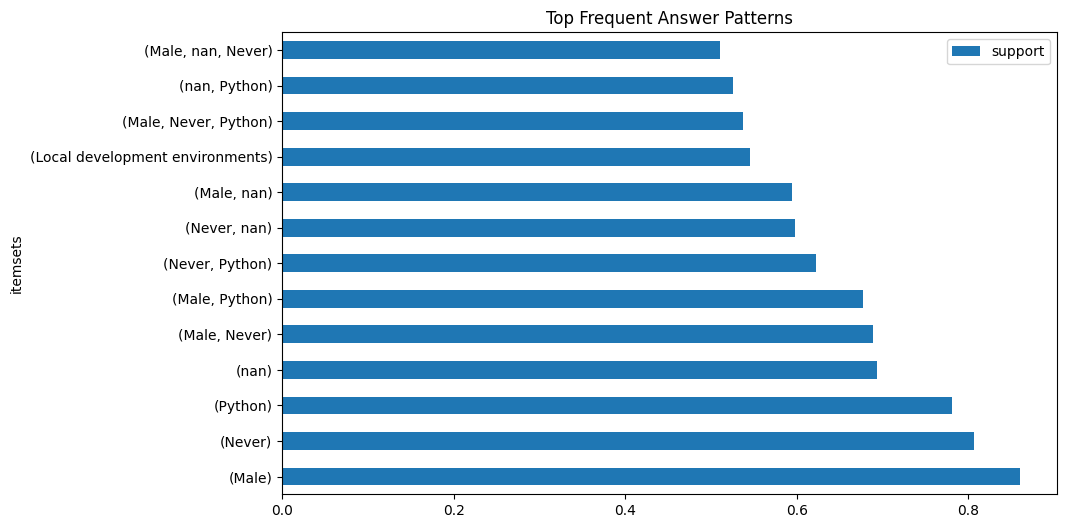

In [28]:
import matplotlib.pyplot as plt

# Plot top frequent patterns
frequent_itemsets.sort_values(by='support', ascending=False).head(20).plot(
    x='itemsets', y='support', kind='barh', figsize=(10, 6))
plt.title('Top Frequent Answer Patterns')
plt.show()
